糖尿病分类问题 Pima Indians Diabetes Data Set

In [78]:
# 首先 import 必要的模块
import pandas as pd 
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from matplotlib import pyplot
import seaborn as sns
%matplotlib inline


In [79]:
# 读取数据
# path to where the data lies
#dpath = './data/'
data = pd.read_csv('C:/Users/Lzg/Desktop/data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [81]:
data.shape

(768, 9)

In [82]:
## 各属性的统计特性
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


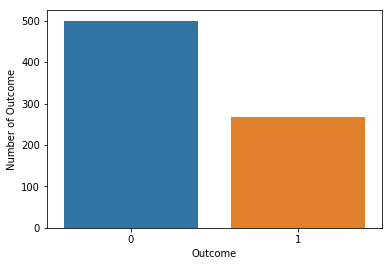

In [83]:
# Target 分布，看看各类样本分布是否均衡
sns.countplot(data.Outcome);
pyplot.xlabel('Outcome');
pyplot.ylabel('Number of Outcome');

**样本不均衡，y=1，即糖尿病样本偏少，在后面模型训练中，class_weight='balanced'，来调节样本权重**

**Insulin缺失数据374，SkinThickness 缺失数据221，Pregnancies缺失数据111,因为样本量偏少，不删除，保留数据**

In [84]:
# 从原始数据中分离输入特征x和输出y
y = data['Outcome'].values
X = data.drop('Outcome', axis = 1)
#X = X.drop('Insulin', axis = 1)
#用于后续显示权重系数对应的特征
#columns = X.columns

In [85]:
#将数据分割训练数据与测试数据
from sklearn.model_selection import train_test_split

# 随机采样20%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)
X_train.shape


#如何保证训练集和测试集类别比例与总体样本是相同的？？？？？？


(614, 8)

In [86]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 分别初始化对特征和目标值的标准化器
ss_X = StandardScaler()

# 分别对训练和测试数据的特征以及目标值进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)


**default Logistic Regression**

In [87]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(class_weight='balanced')

# 训练：参数估计
lr1=lr.fit(X_train, y_train)

# 预测
y_test_pred_lr = lr.predict(X_test)
y_train_pred_lr = lr.predict(X_train)

In [88]:
# 交叉验证用于评估模型性能和进行参数调优（模型选择）
#分类任务中交叉验证缺省是采用StratifiedKFold
from sklearn.cross_validation import cross_val_score
loss = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_log_loss')
print ('logloss of each fold is: ',-loss)
print('cv logloss is:', -loss.mean())

logloss of each fold is:  [0.48713493 0.50257776 0.59668783 0.44808974 0.51958626]
cv logloss is: 0.5108153017920756


In [89]:
#在校验集上测试，估计模型性能

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

print("Classification report for classifier %s:\n%s\n"
      % (lr1, classification_report(y_test, y_test_pred_lr)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_test_pred_lr))

Classification report for classifier LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.83      0.83      0.83        99
          1       0.69      0.69      0.69        55

avg / total       0.78      0.78      0.78       154


Confusion matrix:
[[82 17]
 [17 38]]


**正则化的 Logistic Regression及参数调优**

logistic回归的需要调整超参数有：C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和正则函数penalty（L2/L1） 目标函数为：J = sum(logloss(f(xi), yi)) + C* penalty 
在sklearn框架下，不同学习器的参数调整步骤相同： 设置候选参数集合 调用GridSearchCV 调用fit


In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#需要调优的参数

penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)

lr_penalty= LogisticRegression(class_weight='balanced')
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')
grid_lr=grid.fit(X_train,y_train)

In [91]:
# examine the best model
print(-grid.best_score_)
print(grid.best_params_)

0.510864608366301
{'C': 1, 'penalty': 'l2'}


D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


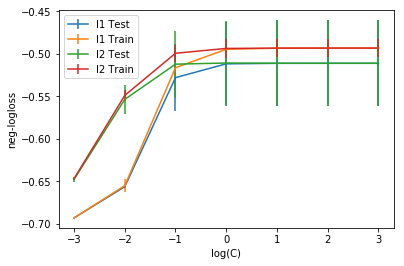

In [92]:

# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]


# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(n_Cs,number_penaltys)
train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)
train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    pyplot.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    pyplot.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'neg-logloss' )
pyplot.savefig('LogisticGridSearchCV_C.png' )

pyplot.show()

In [93]:
#在校验集上测试，估计模型性能

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
y_test_pred_grid=grid.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (grid_lr, classification_report(y_test, y_test_pred_grid)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_test_pred_grid))

Classification report for classifier GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0):
             precision    recall  f1-score   support

          0       0.83      0.83      0.83        99
          1       0.69      0.69      0.69        55

avg / total       0.78      0.78      0.78       154


Confusion matrix:
[[82 17]
 [17 38]]


**从Classification report看，类别1即糖尿病的预测结果不准，f1-score只有0.69**

**default SVC**

In [94]:
#LinearSVC不能得到每类的概率，在Otto数据集要求输出每类的概率，这里只是示意SVM的使用方法
#https://xacecask2.gitbooks.io/scikit-learn-user-guide-chinese-version/content/sec1.4.html
#1.4.1.2. 得分与概率
from sklearn.svm import LinearSVC

SVC1 = LinearSVC(class_weight='balanced').fit(X_train, y_train)

In [95]:
#在校验集上测试，估计模型性能

from sklearn.model_selection import GridSearchCV

#SVM并不能直接输出各类的概率，所以在这个例子中我们用正确率作为模型预测性能的度量
#from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
y_predict = SVC1.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (SVC1, classification_report(y_test, y_predict)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_predict))

Classification report for classifier LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

          0       0.81      0.83      0.82        99
          1       0.68      0.65      0.67        55

avg / total       0.76      0.77      0.77       154


Confusion matrix:
[[82 17]
 [19 36]]


**性能较logistic回归有下降**


**线性SVM正则参数调优**

线性SVM LinearSVC的需要调整正则超参数包括C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和正则函数penalty（L2/L1） 

采用交叉验证，网格搜索步骤与Logistic回归正则参数处理类似，在此略。

In [96]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV


#需要调优的参数

penaltys = ['l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)
SVC2 = LinearSVC(class_weight='balanced')
grid= GridSearchCV(SVC2, tuned_parameters,cv=5)
grid_SVC=grid.fit(X_train,y_train)



# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.758957654723127
{'C': 0.01, 'penalty': 'l2'}


D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


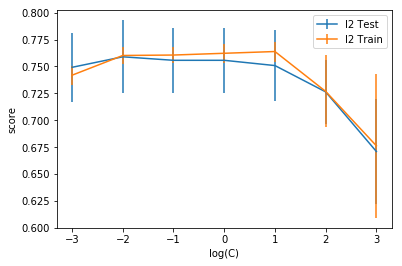

In [97]:
# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]


# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(n_Cs,number_penaltys)
train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)
train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    pyplot.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    pyplot.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'score' )
pyplot.savefig('svc.png' )

pyplot.show()

In [98]:
#在校验集上测试，估计模型性能

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
y_pred=grid.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (grid, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

Classification report for classifier GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0):
             precision    recall  f1-score   support

          0       0.81      0.83      0.82        99
          1       0.68      0.65      0.67        55

avg / total       0.76      0.77      0.77       154


Confusion matrix:
[[82 17]
 [19 36]]


**SVM（f1-score平均0.77）性能较logistic（f1-score平均0.78）有下降，但是差别不大，都是在‘0’的结果上预测更准，在‘1’的样本上预测情况较差，对于不均衡样本仅使用class_wight效果有限**



**RBF核SVM正则参数调优**

RBF核是SVM最常用的核函数。 RBF核SVM 的需要调整正则超参数包括C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和核函数的宽度gamma C越小，决策边界越平滑； gamma越小，决策边界越平滑。

In [99]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


#需要调优的参数
SVC3 = SVC(class_weight='balanced')
gamma_s=[0.001, 0.01, 0.1, 1, 10, 100]
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
tuned_parameters = dict(gamma= gamma_s, C = Cs)

grid= GridSearchCV(SVC3, tuned_parameters,cv=5)
grid_SVC=grid.fit(X_train,y_train)



# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.758957654723127
{'C': 10, 'gamma': 0.01}


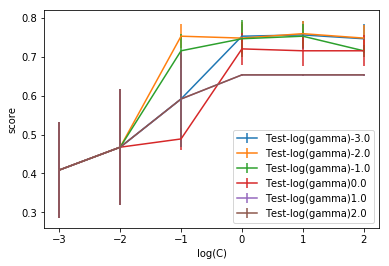

In [100]:

# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]


n_Cs = len(Cs)
number_gamma = len(gamma_s)

# plot results
test_scores = np.array(test_means).reshape(n_Cs,number_gamma)
test_stds = np.array(test_stds).reshape(n_Cs,number_gamma)

x_axis = np.log10(Cs)
for i, gamma in enumerate(gamma_s):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    pyplot.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = 'Test-log(gamma)' + str(np.log10(gamma)))
      
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'score' )
pyplot.savefig('svc_rbf.png' )

pyplot.show()

In [101]:
#在校验集上测试，估计模型性能

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
y_pred=grid.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (grid, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

Classification report for classifier GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0):
             precision    recall  f1-score   support

          0       0.83      0.83      0.83        99
          1       0.69      0.69      0.69        55

avg / total       0.78      0.78      0.78       154


Confusion matrix:
[[82 17]
 [17 38]]


**RBF核的SVM训练结果与带正则的logistic回归一样（f1_score都是0.78）**